### Data Loader Test

Let's test the data loader we created

In [7]:
# ! python -m pip install ipywidgets widgetsnbextension pandas-profiling

In [8]:
# !jupyter nbextension enable --py widgetsnbextension

In [9]:
import matplotlib.pyplot as plt

In [10]:
import torch

In [11]:
from dataloader_new import AnimeDataLoader, AnimeGAN

In [12]:
data_dir = "/home/mgfos207/Desktop/PetProjects/DLDataPreproccessing/test_faces_split/train"
anime_data_loader = AnimeDataLoader((64,64), 20, data_dir)

In [13]:
ngpu = 1
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

In [14]:
# xb = torch.randn(128, 128, 1, 1) #
image_size = 64
batch_size = 20
latent_size = 64
xb = torch.randn(batch_size, latent_size, 1, 1)

In [15]:
devxb = xb.to(device)

In [16]:
gan = AnimeGAN(anime_data_loader.data_loader, devxb)

In [17]:
gen = gan.generator

In [18]:
# fake_imgs = gen(xb)
fake_imgs = gen(devxb)

In [19]:
stats = (0.5, 0.5, 0.5), (0.5, 0.5, 0.5)

In [20]:
def denorm(img_tensors):
    return img_tensors * stats[1][0] + stats[0][0]


In [31]:
# gan.fit(1000, .00003)

In [28]:
gen1 = gan.generator

In [29]:
trained_img = gen1(devxb)

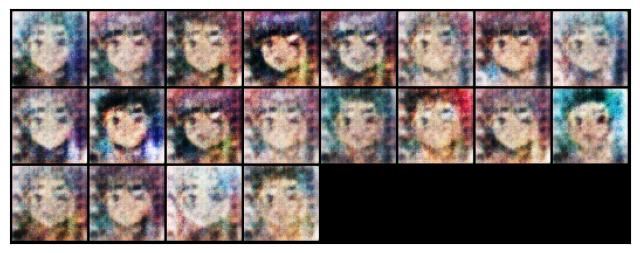

In [30]:
gan.show_images(trained_img.cpu().detach())

In [ ]:
%reload_ext tensorboard
%tensorboard --logdir lightning_logs/